In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os

data_path = ['data']
filepath = os.sep.join(data_path + ['bird_small.mat'])
mat = scipy.io.loadmat(filepath)

In [2]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [3]:
mat['A']

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

Importação da imagem original

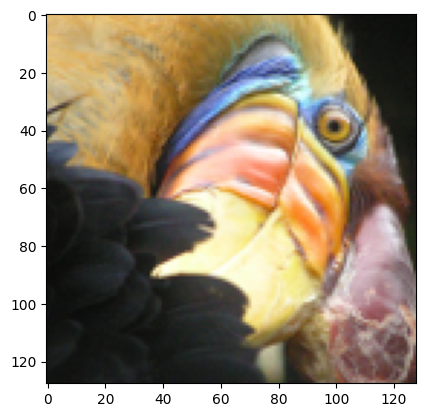

In [4]:
plt.imshow(mat['A'])

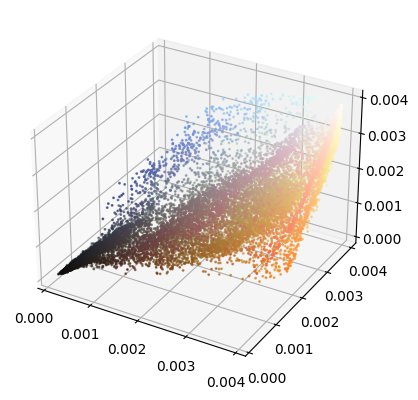

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
pixels = mat['A'].reshape(16384,3)/255
r = (pixels/255)[:,0]
g = (pixels/255)[:,1]
b = (pixels/255)[:,2]
step = 1
ax.scatter(r[::step], g[::step], b[::step], c=pixels[::step], s=1)
plt.show()

Mapeamento das cores da imagem original, total de cores/pontos: 16.581.375

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16, n_init='auto').fit(pixels)

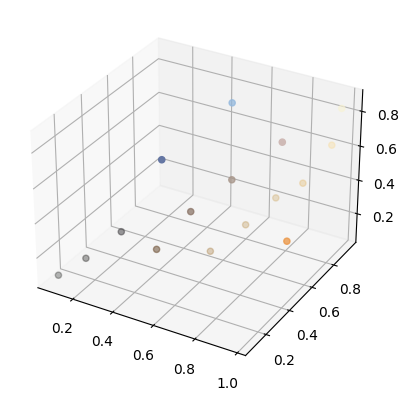

In [7]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c=centers)
plt.show()

No gráfico acima, fizemos a redução de 16.581.375 cores para 16 cores. 

In [8]:
new_image = np.zeros((labels.size, 3))
#new_image
for i in range(labels.size):
    new_image[i] = centers[labels[i]]
new_image

array([[0.8125855 , 0.67646587, 0.42382188],
       [0.90104329, 0.75150573, 0.49352571],
       [0.90104329, 0.75150573, 0.49352571],
       ...,
       [0.17520669, 0.1728621 , 0.16377593],
       [0.17520669, 0.1728621 , 0.16377593],
       [0.17520669, 0.1728621 , 0.16377593]])

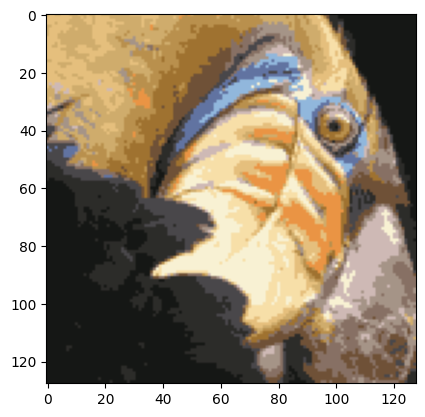

In [9]:
plt.imshow(new_image.reshape(128,128,3))

Imagem resultante com escala de cores reduzidas para 16